In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import plot_tree
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_data.csv' with your actual file)
df = pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\College work\Machine Learning Lab\heart_failure_clinical_records.csv')

# Define a function to create the combined feature column
def combined_risk_factor(row):
    #Calculates a combined risk factor score based on multiple features.

    score = 0
    if row['age'] > 65:
        score += 1
    if row['serum_creatinine'] > 1.2:
        score += 1
    if row['ejection_fraction'] < 35:
        score += 1
    if row['high_blood_pressure'] == 1:
        score += 1
    if row['serum_creatinine'] > 1.3:
        score += 1
    if row['serum_sodium'] > 135:
        score += 1
    if row['smoking'] == 1:
        score += 1
    return score

# Add the combined risk factor column to the DataFrame
df['combined_risk_factor'] = df.apply(combined_risk_factor, axis=1)

print(f"New column added: 'combined_risk_factor'")
print("Significance: This column combines multiple risk factors into a single score, "
      "providing a simpler representation of overall risk for easier interpretation.")

# Create the time-of-day category (Using numerical values)
df['time_of_day'] = pd.cut(df['time'], bins=[0, 72, 144, 216, 288], labels=False, include_lowest=True) + 1

print(f"New column added: 'time_of_day'")
print("Significance: Divides the 'time' variable into four quarters of the day (1-4), "
      "allowing us to analyze potential time-dependent patterns.")

# Data Preprocessing (FOR MASTER CODE)
X = df.drop('DEATH_EVENT', axis=1)  # Features
y = df['DEATH_EVENT']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models (FOR MASTER CODE)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred)
    }

# Print Performance Results (FOR MASTER CODE)
print("Model Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.3f}")




New column added: 'combined_risk_factor'
Significance: This column combines multiple risk factors into a single score, providing a simpler representation of overall risk for easier interpretation.
New column added: 'time_of_day'
Significance: Divides the 'time' variable into four quarters of the day (1-4), allowing us to analyze potential time-dependent patterns.
Model Performance:
Logistic Regression:
  Accuracy: 0.847
  Precision: 0.770
  Recall: 0.733
  F1-Score: 0.751
  ROC-AUC: 0.816
Decision Tree:
  Accuracy: 0.985
  Precision: 0.980
  Recall: 0.972
  F1-Score: 0.976
  ROC-AUC: 0.981
Random Forest:
  Accuracy: 0.993
  Precision: 0.992
  Recall: 0.986
  F1-Score: 0.989
  ROC-AUC: 0.991


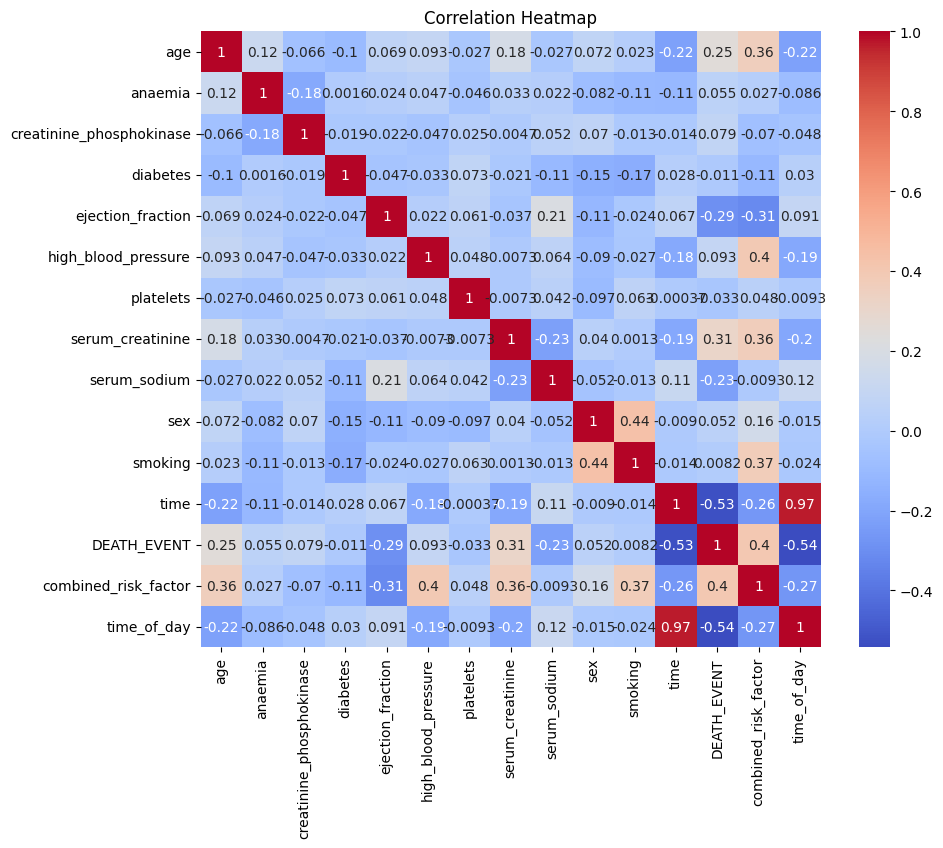

In [9]:
# Visualizations 
# 1. Heatmap of Feature Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


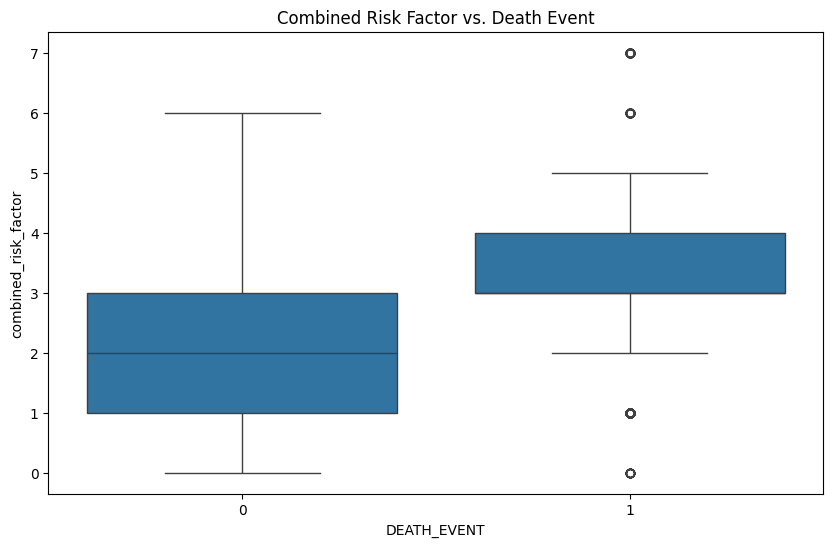

In [10]:
# 2. Box Plots of Risk Factors
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='combined_risk_factor', data=df)  # Use 'DEATH_EVENT' for x
plt.title("Combined Risk Factor vs. Death Event")
plt.show()



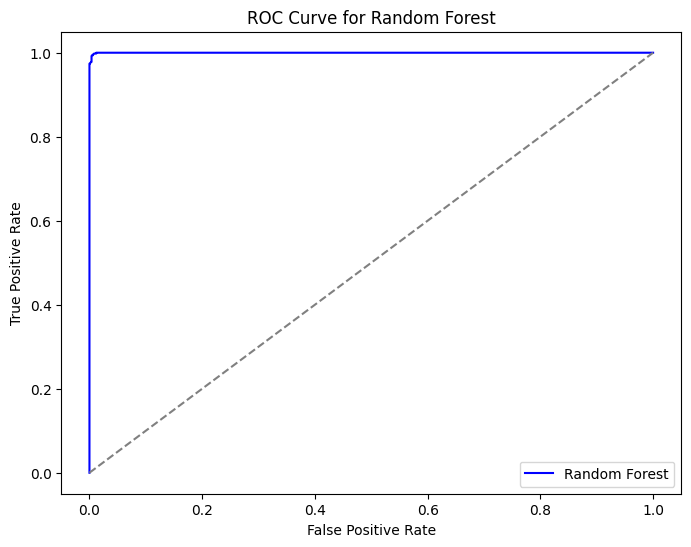

In [11]:
# 3. ROC Curve for Random Forest
y_pred_proba = models['Random Forest'].predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest', color='blue')  # Blue line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()


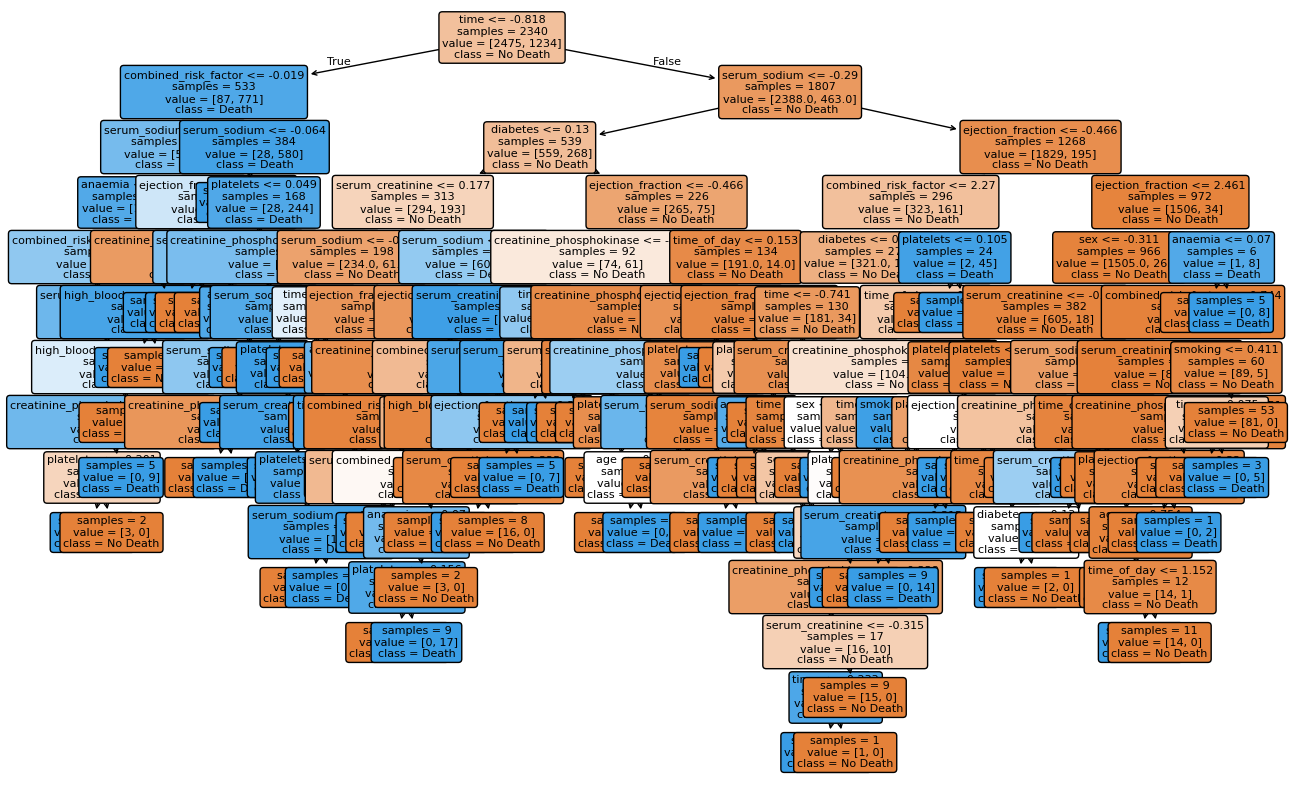

In [12]:
# 4. Random Forest Tree Visualization (Pick a single tree from the forest)
rf_model = models['Random Forest']
tree_index = 0  # Select a specific tree from the forest
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[tree_index], 
          feature_names=X.columns, # Correct feature_names for the NN data
          class_names=['No Death', 'Death'],  
          filled=True,  # Color the nodes
          rounded=True,  # Rounded corners
          impurity=False,  # Don't show impurity values
          fontsize=8)  # Adjust font size
plt.show()



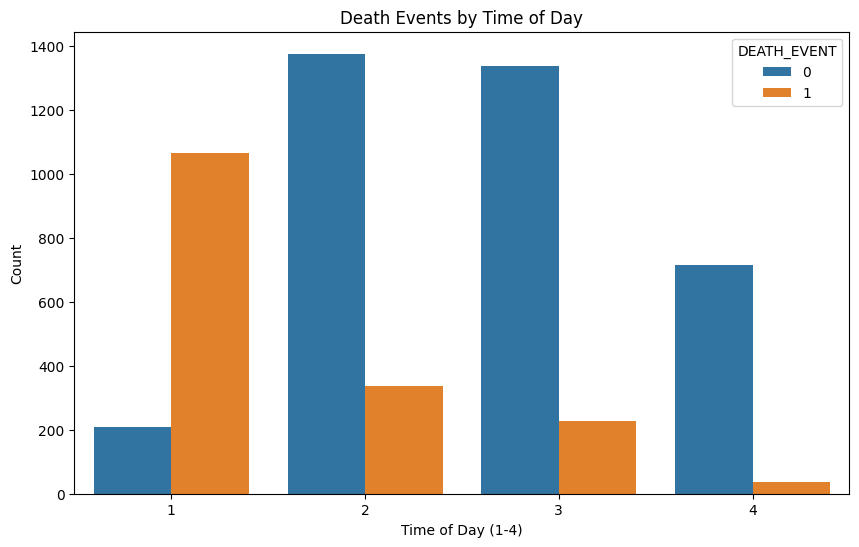

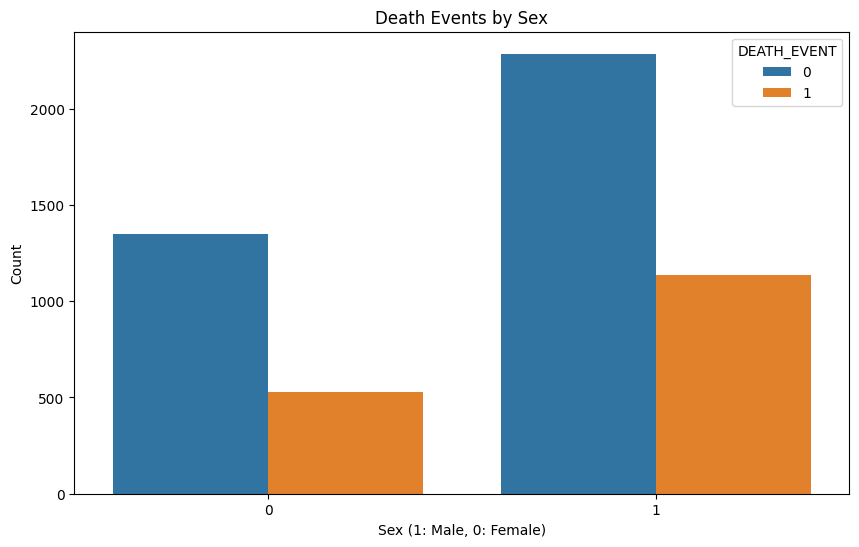

<Figure size 1000x600 with 0 Axes>

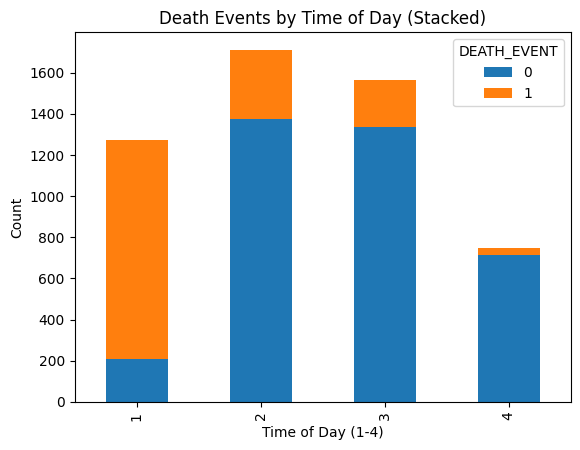

<Figure size 1000x600 with 0 Axes>

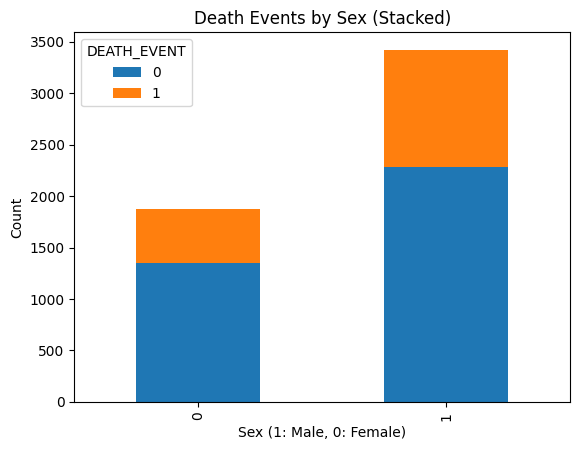

In [13]:
# 5. Analyze Relationships (Visualizations)

# Grouped Bar Plots
plt.figure(figsize=(10, 6))
sns.countplot(x='time_of_day', hue='DEATH_EVENT', data=df)
plt.title('Death Events by Time of Day')
plt.xlabel('Time of Day (1-4)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='DEATH_EVENT', data=df)
plt.title('Death Events by Sex')
plt.xlabel('Sex (1: Male, 0: Female)')
plt.ylabel('Count')
plt.show()

# Stacked Bar Plots
plt.figure(figsize=(10, 6))
time_of_day_counts = df.groupby(['time_of_day', 'DEATH_EVENT']).size().unstack()
time_of_day_counts.plot(kind='bar', stacked=True)
plt.title('Death Events by Time of Day (Stacked)')
plt.xlabel('Time of Day (1-4)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sex_counts = df.groupby(['sex', 'DEATH_EVENT']).size().unstack()
sex_counts.plot(kind='bar', stacked=True)
plt.title('Death Events by Sex (Stacked)')
plt.xlabel('Sex (1: Male, 0: Female)')
plt.ylabel('Count')
plt.show()


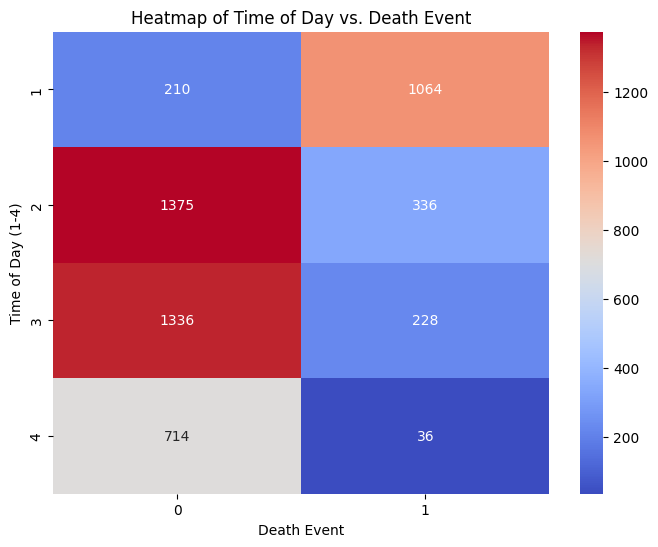

Crosstab: Time of Day vs. Death Event
 DEATH_EVENT     0     1
time_of_day            
1             210  1064
2            1375   336
3            1336   228
4             714    36
Crosstab: Sex vs. Death Event
 DEATH_EVENT     0     1
sex                    
0            1349   528
1            2286  1136
Crosstab: Diabetes vs. Death Event
 DEATH_EVENT     0    1
diabetes              
0            2029  948
1            1606  716


In [14]:
# Heatmap of Crosstab for Time of Day
crosstab_time_death = pd.crosstab(df['time_of_day'], df['DEATH_EVENT'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_time_death, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Time of Day vs. Death Event')
plt.xlabel('Death Event')
plt.ylabel('Time of Day (1-4)')
plt.show()

# Crosstabs
crosstab_time_death = pd.crosstab(df['time_of_day'], df['DEATH_EVENT'])
print("Crosstab: Time of Day vs. Death Event\n", crosstab_time_death)

crosstab_sex_death = pd.crosstab(df['sex'], df['DEATH_EVENT'])
print("Crosstab: Sex vs. Death Event\n", crosstab_sex_death)

crosstab_diabetes_death = pd.crosstab(df['diabetes'], df['DEATH_EVENT'])
print("Crosstab: Diabetes vs. Death Event\n", crosstab_diabetes_death)


Neural Network Accuracy: 0.936


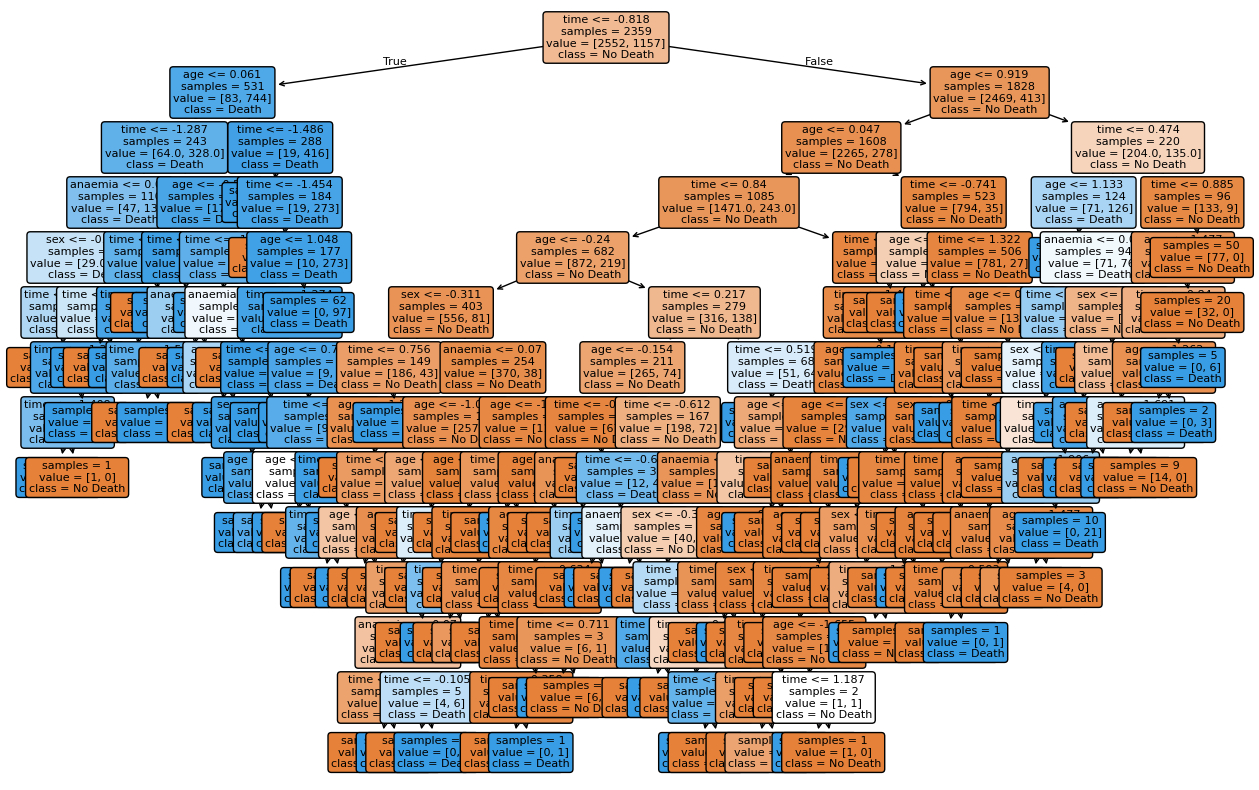

In [16]:
# 6. Neural Network Analysis
# Create a new DataFrame with the selected features
nn_df = df[['sex', 'time', 'anaemia', 'age', 'DEATH_EVENT']]

# Split data into training and testing sets
X_nn = nn_df.drop('DEATH_EVENT', axis=1)  # Features
y_nn = nn_df['DEATH_EVENT']  # Target variable
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_nn_train = scaler.fit_transform(X_nn_train)
X_nn_test = scaler.transform(X_nn_test)

# Train the neural network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
nn_model.fit(X_nn_train, y_nn_train)

# Evaluate the neural network
y_nn_pred = nn_model.predict(X_nn_test)
nn_accuracy = accuracy_score(y_nn_test, y_nn_pred)
print(f"Neural Network Accuracy: {nn_accuracy:.3f}")

# 4. Random Forest Tree Visualization (Pick a single tree from the forest)  
# Now in the NN section
rf_model = RandomForestClassifier()
rf_model.fit(X_nn_train, y_nn_train)
tree_index = 0  # Select a specific tree from the forest
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[tree_index], 
          feature_names=X_nn.columns, # Correct feature_names for the NN data
          class_names=['No Death', 'Death'],  
          filled=True,  # Color the nodes
          rounded=True,  # Rounded corners
          impurity=False,  # Don't show impurity values
          fontsize=8)  
plt.show()